# Code to plot the light curves of artificial shapes for different Limb Darkening Coefficients

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
# train_lc = np.load(train_lc_dir)
# train_lc[0].shape[0]
# train_lc.shape[0]

In [4]:
train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
train_lc = np.load(train_lc_dir)
same_shape_diff_LDC_lc = np.zeros((9,train_lc[0].shape[0]))
del train_lc

for i in np.arange(1,10,1):
    train_lc_dir =  f'../../data/train/npy/lc/lc_{i}_shape_5.npy'
    train_lc = np.load(train_lc_dir)
    same_shape_diff_LDC_lc[i-1] = train_lc[0]
    del train_lc


In [5]:
# 2. Normalize the lightcurves
## - Train Set
train_lc = np.copy(same_shape_diff_LDC_lc)
del same_shape_diff_LDC_lc
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))


In [6]:
# Add flat line towards left and right of dip
# 10 data points on each side
# 3. Extend the lightcurves
## - Train Set
train_lc_scaled_append = np.ones((train_lc.shape[0],120))
print('train_lc_scaled_append.shape = ',train_lc_scaled_append.shape)
print("len(train_lc_scaled_append[0,10:110]) = ",len(train_lc_scaled_append[0,10:110]))

for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled_append[i,10:110] = train_lc_scaled[i]

train_lc_scaled_append.shape =  (9, 120)
len(train_lc_scaled_append[0,10:110]) =  100


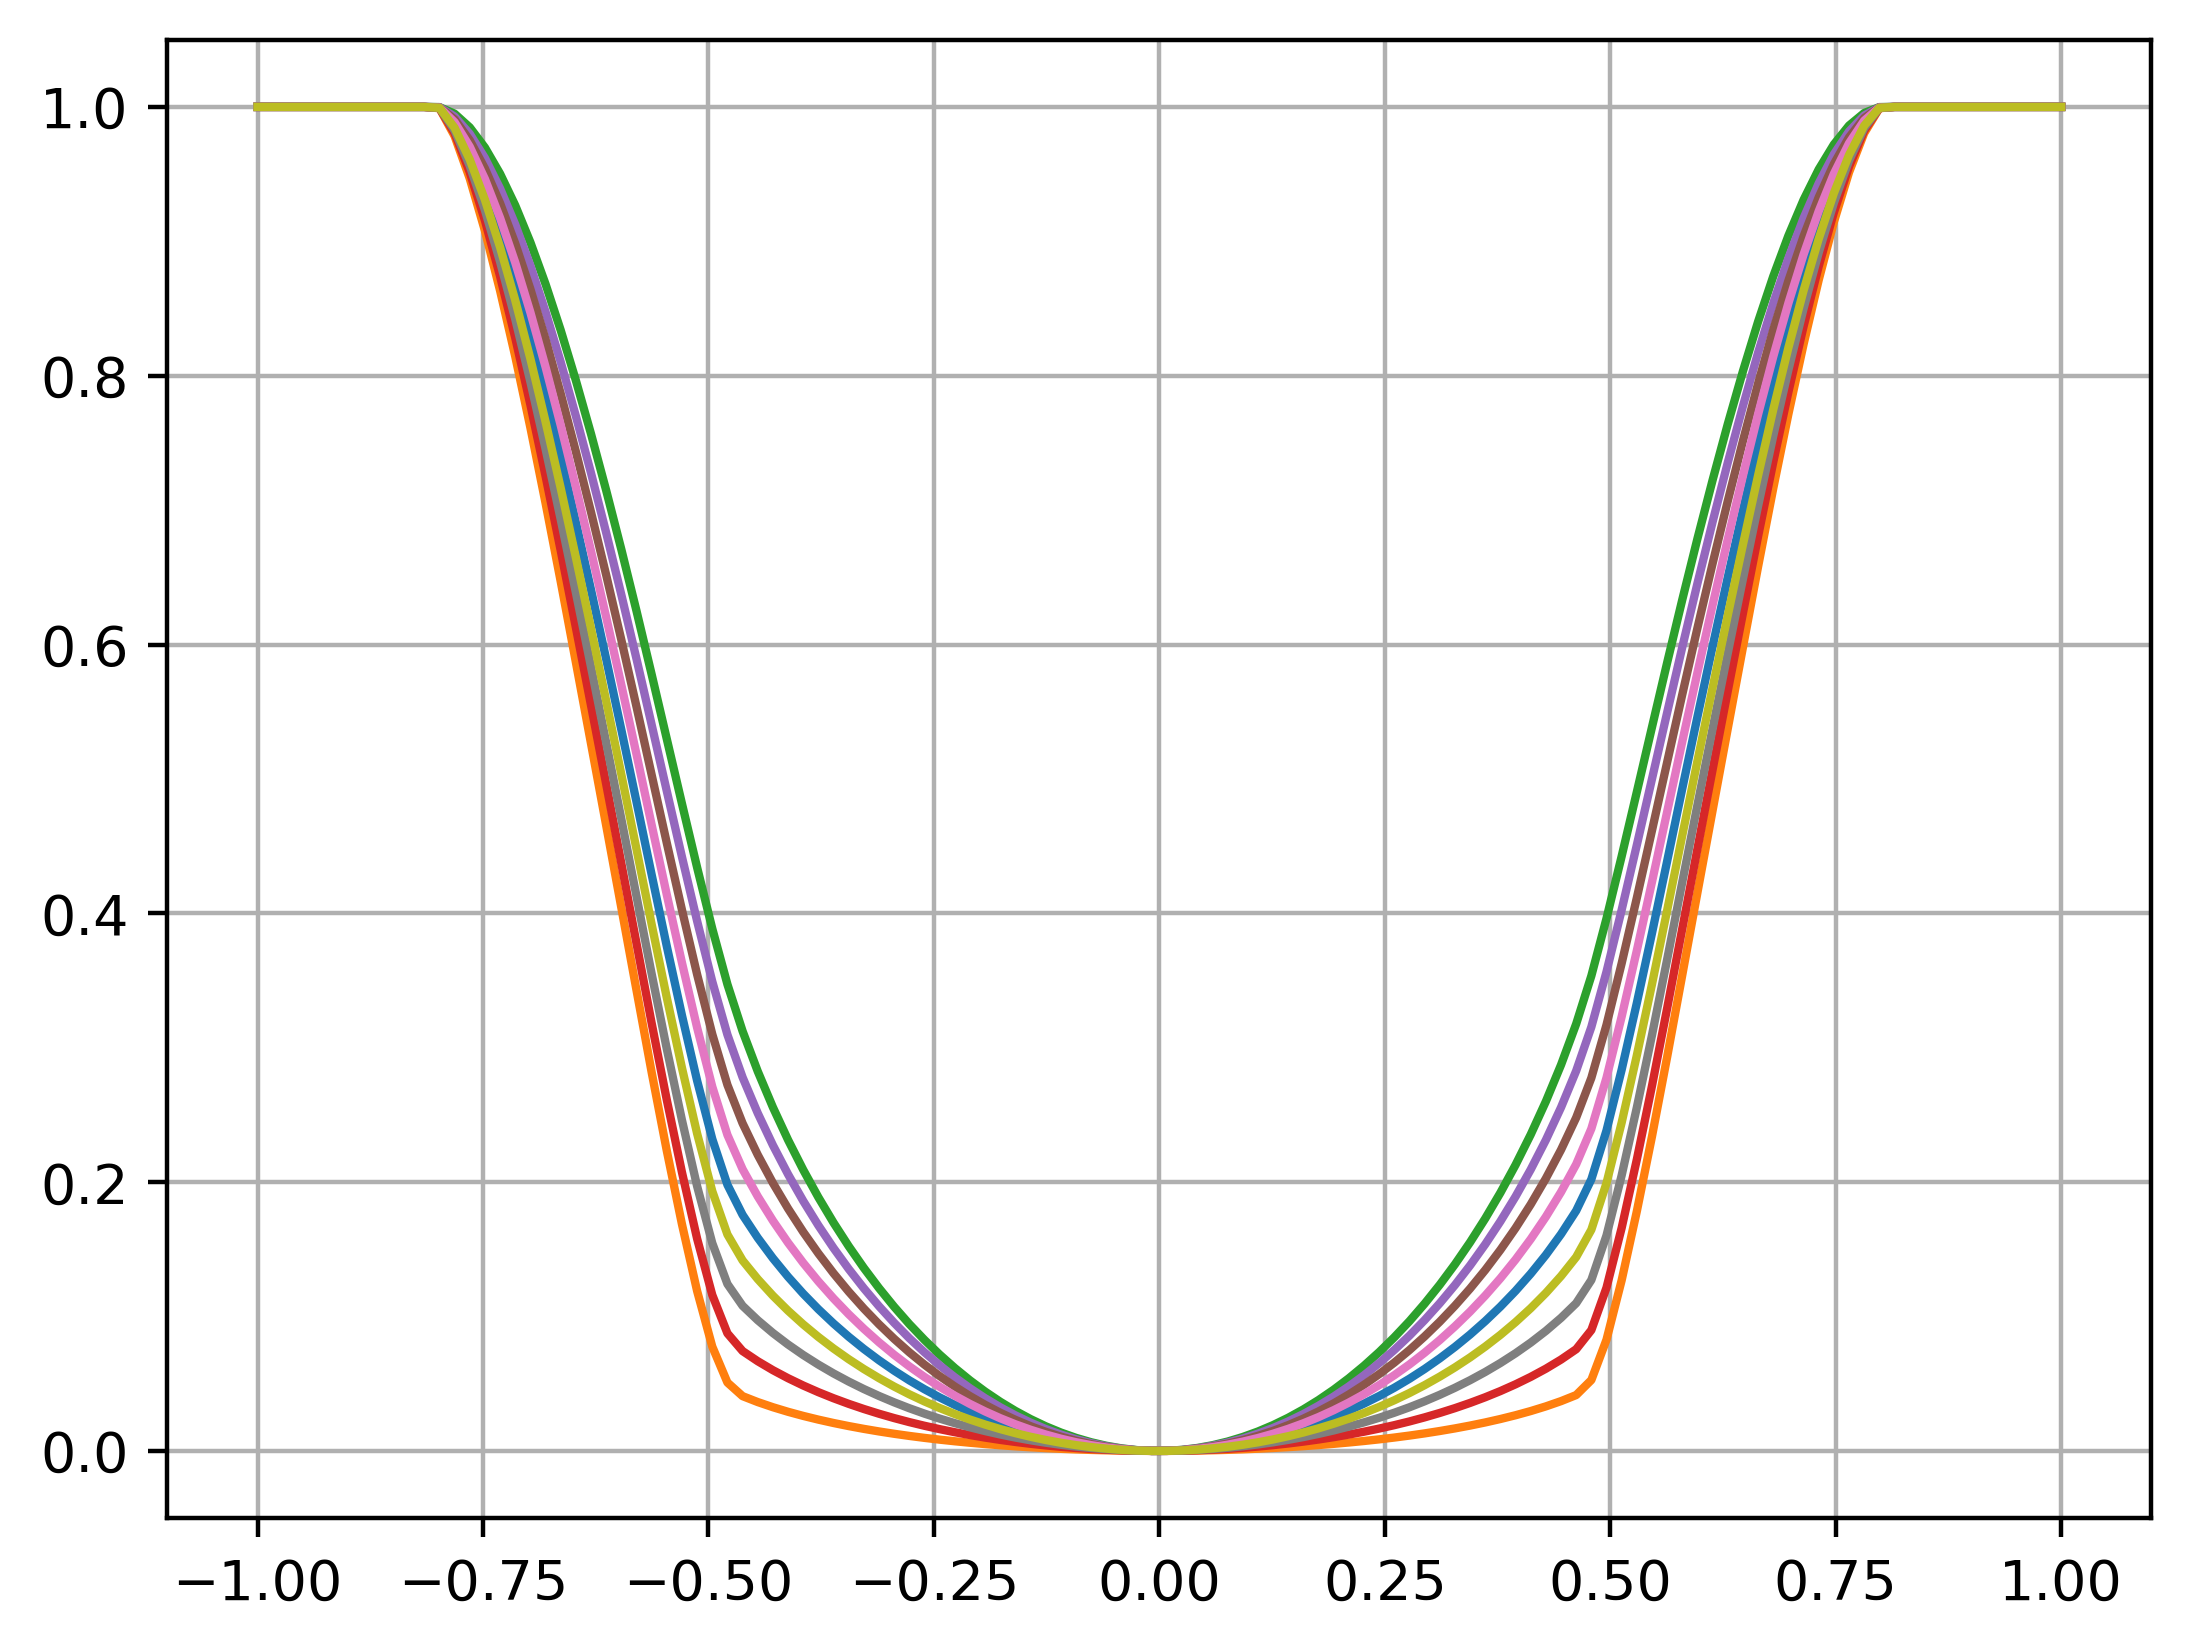

In [12]:
plt.rcParams['figure.dpi'] = 400

# Verification
# Plot - Train LCs
fig, ax = plt.subplots()
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
for i in np.arange(0,9,1):
    ax.plot(ph_simul, train_lc_scaled_append[i],linewidth='1.5')
plt.grid('on')
plt.show()

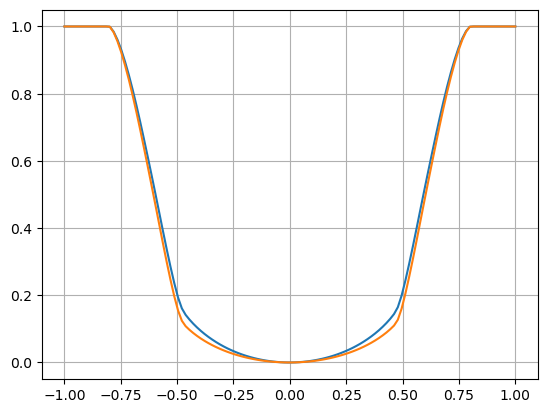

In [8]:
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
plt.plot(ph_simul, train_lc_scaled_append[8],linewidth='1.5')
plt.plot(ph_simul, train_lc_scaled_append[7],linewidth='1.5')

plt.grid('on')
plt.show()


# Plot 3 shapes and their lightcurves single LDCs (overlap)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
train_lc = np.load(train_lc_dir)

# 2. Normalize the lightcurves
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))

# Add flat line towards left and right of dip
# 10 data points on each side
# 3. Extend the lightcurves
## - Train Set
train_lc_scaled_append = np.ones((train_lc.shape[0],120))
print('train_lc_scaled_append.shape = ',train_lc_scaled_append.shape)
print("len(train_lc_scaled_append[0,10:110]) = ",len(train_lc_scaled_append[0,10:110]))

for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled_append[i,10:110] = train_lc_scaled[i]

train_lc_scaled_append.shape =  (132136, 120)
len(train_lc_scaled_append[0,10:110]) =  100


In [5]:
train_shape_dir = '../../data/train/npy/shape/shape_5.npy'
train_shape = np.load(train_shape_dir)

# 2. Normalize the image, convert to opacity map
## Train Set
train_shape = train_shape/np.amax(train_shape)
train_shape_where_0 = np.where(train_shape == 0)
train_shape_where_1 = np.where(train_shape == 1)
train_shape[train_shape_where_0] = 1  # 1 represent the shape (1 opacity)
train_shape[train_shape_where_1] = 0  # 0 represent background (0 opacity)

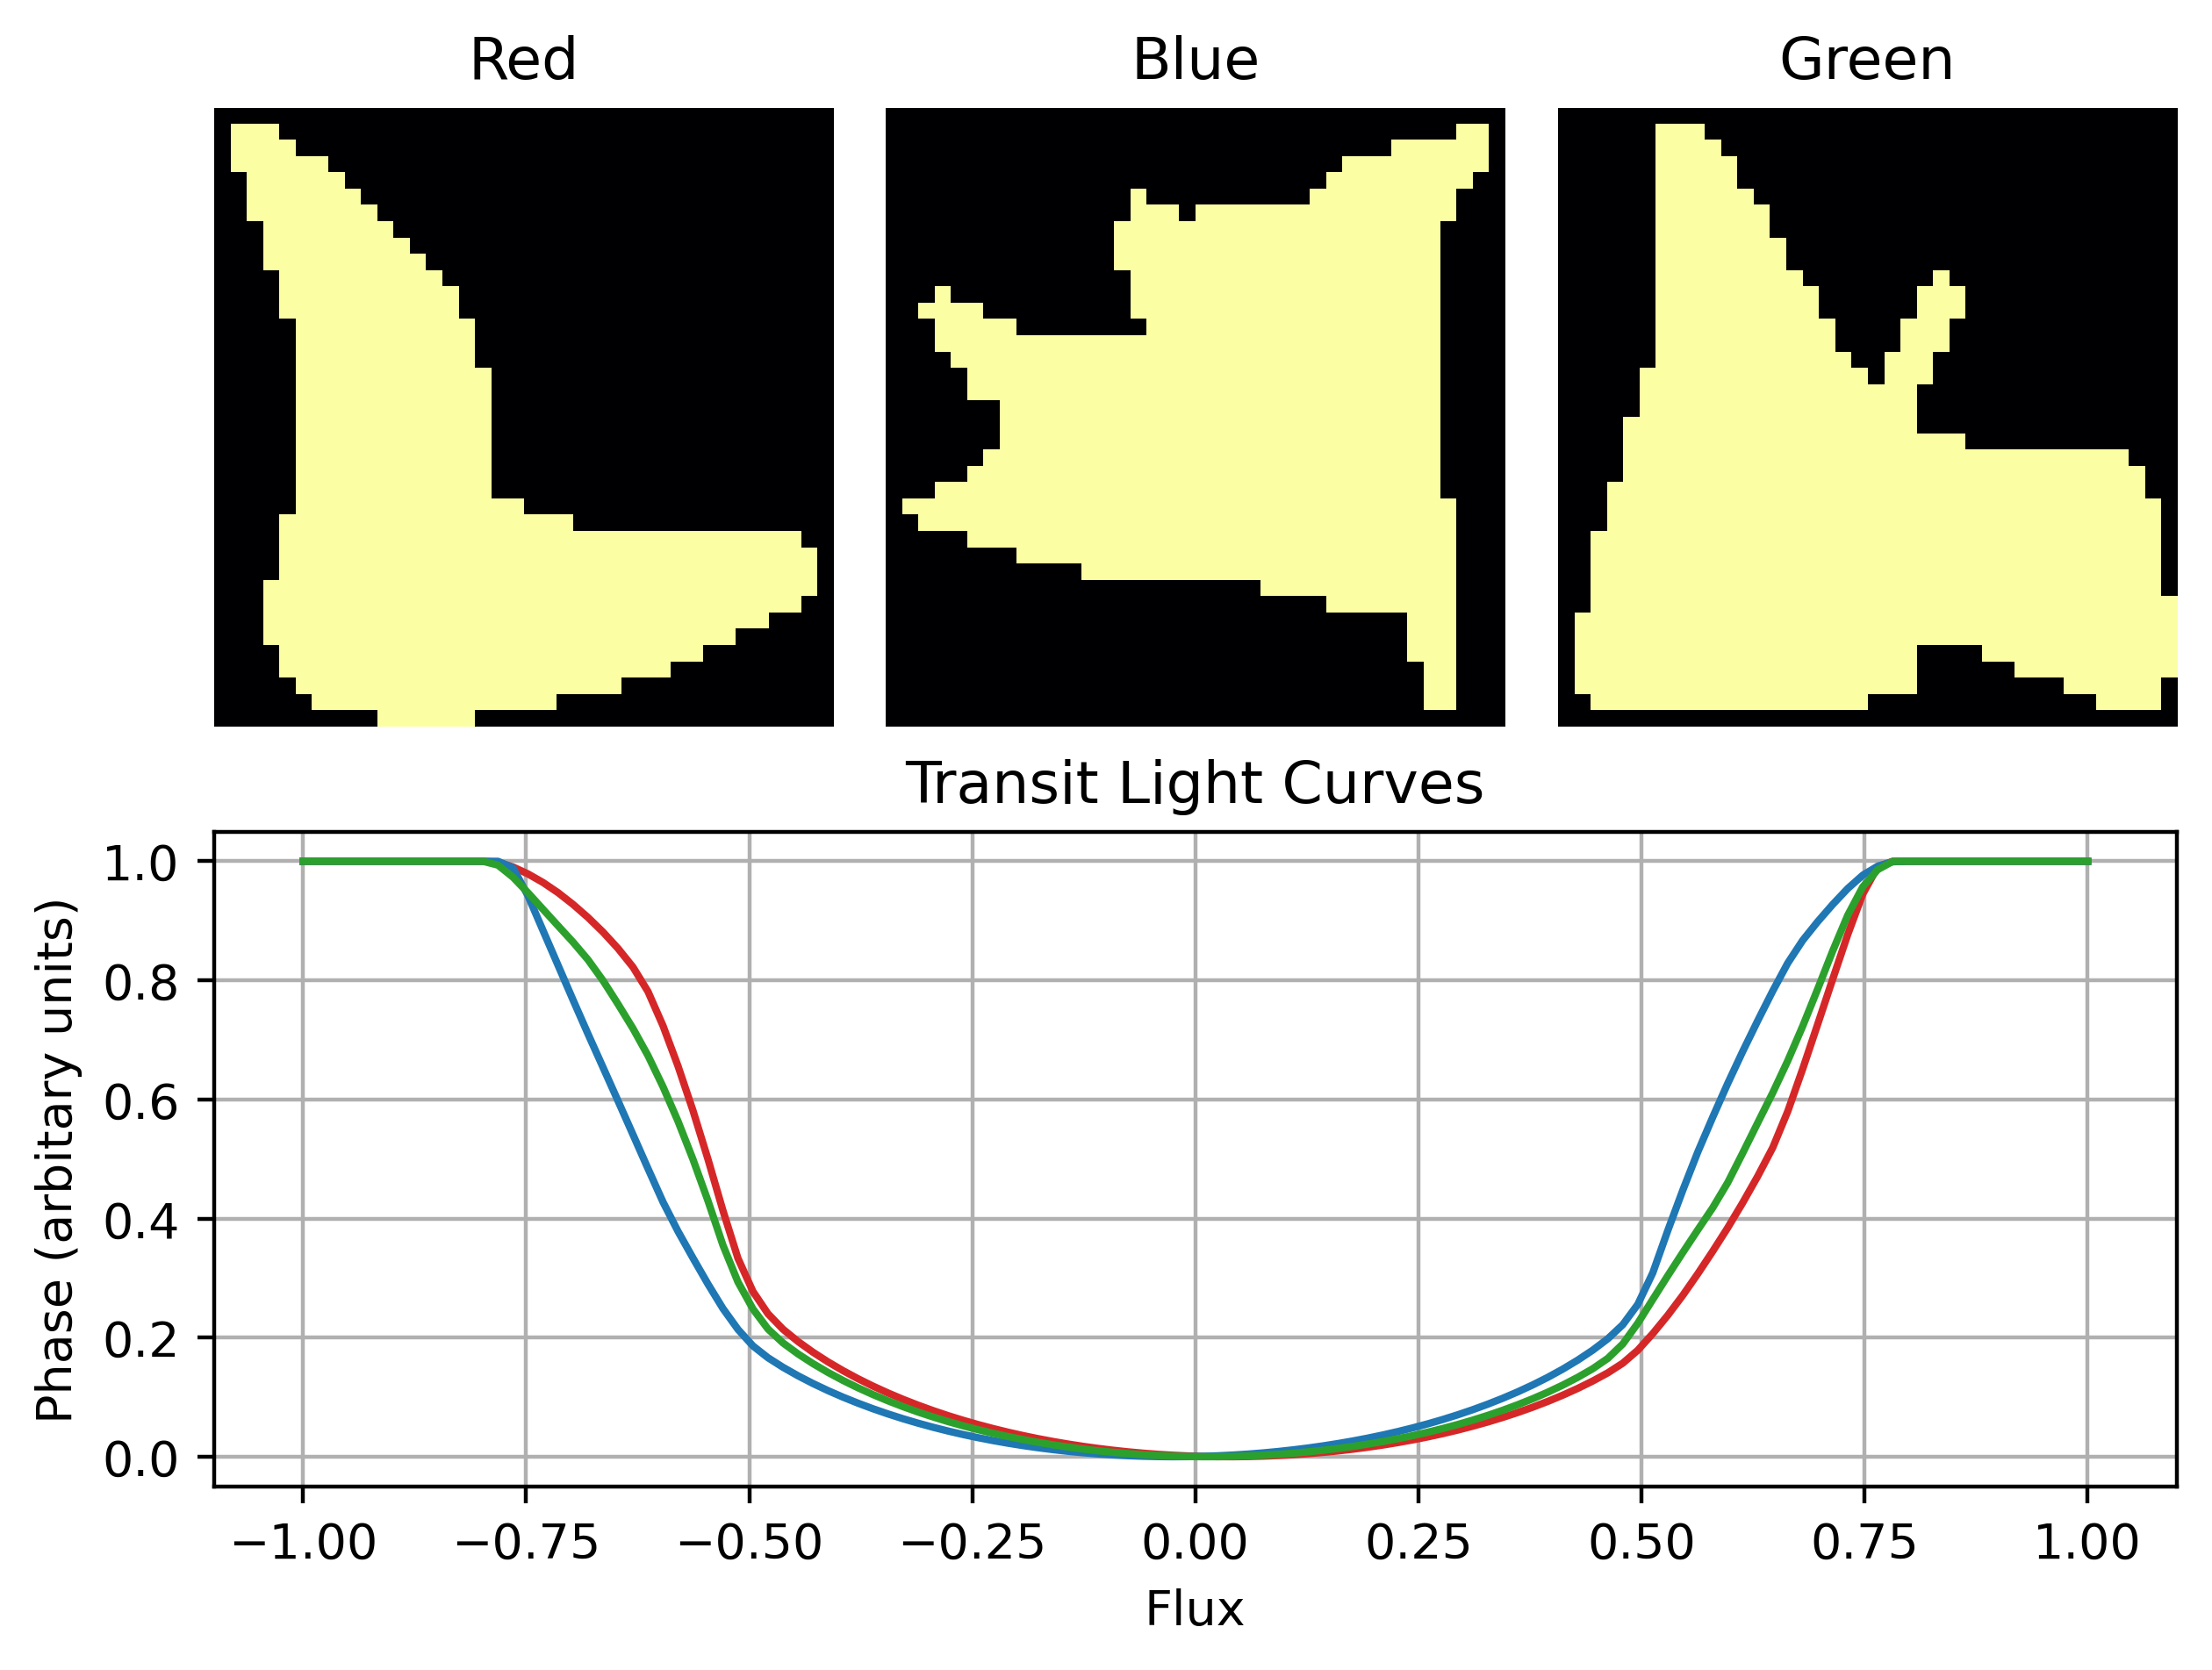

In [10]:
k = np.random.randint(0, len(train_lc_scaled_append)-1, 3)
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
plt.rcParams['figure.dpi'] = 400

# Create Figure 1
plt.subplot(2, 3, 1)
# plt.text(0.5, 0.5, 'Figure 1', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[0]],cmap='inferno')
plt.title('Red')
plt.axis('off')

# Create Figure 2
plt.subplot(2, 3, 2)
# plt.text(0.5, 0.5, 'Figure 2', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[1]],cmap='inferno')
plt.title('Blue')
plt.axis('off')

# Create Figure 3
plt.subplot(2, 3, 3)
# plt.text(0.5, 0.5, 'Figure 3', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[2]],cmap='inferno')
plt.title('Green')
plt.axis('off')

# Create a single figure in the second row
plt.subplot(2, 1, 2)
# plt.text(0.5, 0.5, 'Single Figure', ha='center', va='center', fontsize=12, color='black')
plt.plot(ph_simul,train_lc_scaled_append[k[0]],color='tab:red')
plt.plot(ph_simul,train_lc_scaled_append[k[1]],color='tab:blue')
plt.plot(ph_simul,train_lc_scaled_append[k[2]],color='tab:green')
plt.grid('on')
plt.title('Transit Light Curves')
plt.xlabel('Flux')
plt.ylabel('Phase (arbitary units)')
# plt.axis('off')

# Adjust layout to make sure there is no overlapping
plt.tight_layout()

# Show the plot
plt.show()